# Recherche des racines d'équations non linéaires

**Nom :** &nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&ensp; &emsp;   
**Prénom :** &emsp;&emsp;  

On commence par importer les bibliothèques qui vont bien :

In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Recherche incrémentale

Dans cet exercice, nous allons nous intéresser à la résolution "approchée" de l'équation $f(x)=x^3 −10x^2 +5=0$

- Ecrire la fonction `f(x)` (fonction python classique) qui correspond à la fonction ci-dessus.

Tracer le graphe de la fonction $f$ sur l'intervalle $[-100,100]$ (on fera figurer l'axe en rouge ci-dessous).

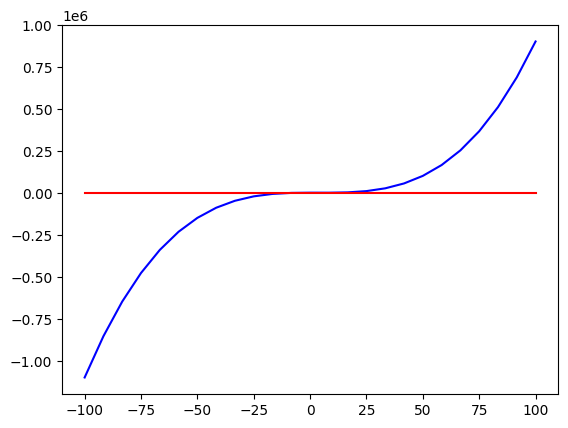

In [27]:
# A écrire

def f(x):
    return x**3 - 10*x**2 + 5

x = np.linspace(-100, 100, 25)
plt.plot(x, f(x), 'b')
plt.plot(x, np.zeros_like(x), 'r')

- A l'aide d'une boucle que vous devez écire, rechercher les racines de $f(x)$ sur l'intervalle [-100,100]  (c'est à dire les valeurs t telles que f(t)=0) en utilisant une méthode de recherche incrémentale, en explorant l'intervalle par pas de 1e-2. Pour réaliser cela,on écrira :
    - Une fonction qui prend en argument les bornes de l'intervalle et le pas, et qui renvoie un tableau numpy à deux dimensions: on aura 2 lignes de N colonnes (s'il y a N racines) : pour chaque colonne il y aura dans la première ligne la borne inférieure et pour la deuxième ligne la borne supérieure pour chacun des N intervalles. 

    - Une boucle qui parcourrera l'intervalle de travail de pas en pas et testera si $f(x) \times f(x+pas)<0$

- Mesurer le temps de calcul (pour cela, précéder l'appel de la commande  `%timeit` : ce qui donnera l'appel `%timeit recherche(-100,100,1e-2)`).
Attention du coup le calcul n'est pas instantané car plusieurs boucles sont faites! (vous testerez d'abord votre fonction et ensuite vous ajoutez le `%timeit`.

In [28]:
def recherche(xmin,xmax,pas):
  res = np.array([[], []])
  while (xmax - xmin) > pas:
    if f(xmin) * f(xmin + pas) < 0:
      res = np.append(res, [[xmin], [xmin + pas]], axis=1)
    xmin += pas
  return res

print(recherche(-100,100,1e-2))
%timeit recherche(-100,100,1e-2)

[[-0.69  0.73  9.94]
 [-0.68  0.74  9.95]]
25.9 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Ecrire ensuite une fonction qui réalise la même opération mais sans boucle, en se basant sur les tableaux de numpy (utiliser arange, where.....)
Mesurer le temps et comparer.

In [29]:
def recherche_vec(xmin,xmax,pas):
  x1 = np.arange(xmin, xmax, pas)
  x2  = x1+pas
  
  list = np.where(f(x1)*f(x2) < 0)

  return np.array([x1[list], x1[list]+pas])

%timeit recherche_vec(-100,100,1e-2)
racines = recherche_vec(-100,100,1e-2)
print(racines)

2.08 ms ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[[-0.69  0.73  9.94]
 [-0.68  0.74  9.95]]


- Refaire le graphique de la première question en limitant le dessin aux valeurs de x dans $[-1,10]$ (on changera le linspace).

- Ajouter sur le schéma les milieux des intervalles obtenus avec les recherches ci-dessus.

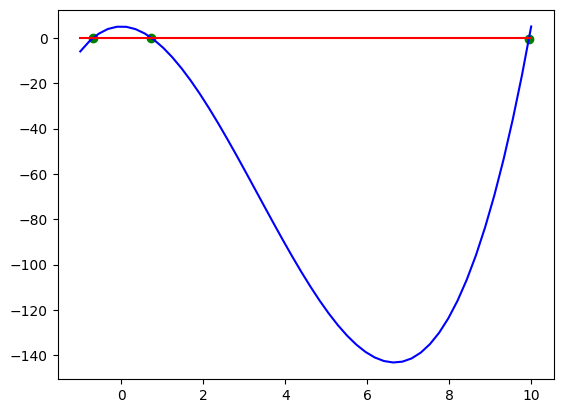

In [30]:

x = np.linspace(-1,10)
plt.plot(x, f(x), 'b')
plt.plot(x, np.zeros_like(x), 'r')



for i in range(len(racines[0])):
  mid = (racines[0][i] + racines[1][i]) / 2
  plt.scatter([mid], [f(mid)], color='g')

## Recherche par dichotomie (ou bissection)

- Ecrire une fonction de recherche d'approximation de racine par dichotomie.Vous devez ici écrire une boucle. Cette fonction affinera la recherche d'une racine, à partir d'un intervalle qui ne contient qu'une unique racine. La fonction prendra comme argument les bornes inférieures et supérieures de l'intervalle à explorer, ainsi qu'un critère d'arrêt `xtol` qui représente la précision souhaitée (largeur de l'intervalle final).

- Nous prendrons comme exemple la fonction précédente ($f(x)=x^3 −10x^2 +5=0$) et nous intéresserons à la racine qui se trouve dans l'intervalle $[0.73, 0.74]$.

Commencer par tracer le graphe de la fonction sur cet intervalle  puis calculer la racine par dichotomie.
On évaluera le temps d'execution  pour cette recherche.

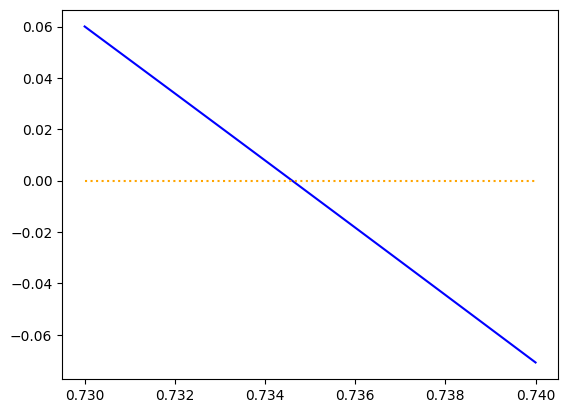

In [31]:
def f(x):
    return x**3 - 10*x**2 + 5

x = np.linspace(0.73, 0.74, 10)
plt.plot(x, f(x), 'b')
plt.plot(x, np.zeros_like(x),  ':', color='orange', label='label')
# plt.title('Plot with Circles and Solid Lines (Orange)')
# plt.legend()


In [32]:

def dicho(a, b, xtol):
    while np.abs(b-a) > xtol:
        m = (a+b) / 2
        if f(a) * f(m) <= 0:
            b = m
        else:
            a = m
    return [a, b]
        
%timeit  dicho(0.73, 0.74, 1e-7)
intervalle = dicho(0.73, 0.74, 1e-7)

sol= (intervalle[0] + intervalle[1]) / 2   
print('intervalle :',intervalle)
print('solution : ',sol)

46.9 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
intervalle : [0.734603500366211, 0.7346035766601563]
solution :  0.7346035385131837


- Effectuer la même recherche de racine,sans boucle, mais en utilisant la librairie `scipy` (fonction `scipy.optimize.bisect`).

- On calculera le temps d'exécution de cette méthode et on comparera avec la méthode précédente.

In [33]:
import scipy as sp
import scipy.optimize

%timeit scipy.optimize.bisect(f, 0.73, 0.74, xtol=1e-7)
sol = scipy.optimize.bisect(f, 0.73, 0.74, xtol=1e-7)
print('solution : ',sol)

45.2 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
solution :  0.7346035003662108


## Méthode de recherche de Newton-Raphson

- Comme précédement, on implémentera (en écrivant la boucle) la méthode de Newton-Raphson (voir cours) puis on utilisera celle de scipy en utilisant la librairie `scipy` (fonction `scipy.optimize.newton`).
  
Le critère d'arret sera exprimé sur les valeurs de f(x), avec $|f(x)|<tol$. 

- Comparer les temps d'éxécution.



In [34]:
def fprime(x):
    return 3*x**2 - 20*x

def newton(x0, tol=0.000001):
    x1 = x0 - f(x0) / fprime(x0)
    while np.abs(x1-x0) > tol:
        x0 = x1
        x1 = x0 - f(x0) / fprime(x0 )
    return x1

x0 = (0.73+ 0.74)/2

%timeit newton(x0, 1e-10)
sol = newton(x0, 1e-10)
print('solution : ',sol)

7.68 µs ± 580 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
solution :  0.7346035077893033


In [35]:
x0 = (0.73+ 0.74)/2

%timeit scipy.optimize.newton(f, x0, fprime=fprime)
sol = scipy.optimize.newton(f, x0, fprime=fprime)
print('solution : ',sol)

139 µs ± 7.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
solution :  0.7346035077893033


## Combinaison de méthodes 
- Combiner la recherche itérative avec la recherche de Newton-Raphson pour trouver précisément les 3 racines de la fonction $f$. 

In [36]:
import scipy as sp
import scipy.optimize
# Afficher Racines de la recherche itérative
# A compléter ...
def recherche(xmin,xmax,pas):
  res = []
  while (xmax - xmin) > pas:
    if f(xmin) * f(xmin + pas) < 0:
      res.append(xmin + pas / 2)
    xmin += pas
  return np.array(res)

print('sols', recherche(-100,100,1e-2))

# Afficher Racines par scipy.optimize.newton 
# A compléter ...
res = []
for i in recherche(-100,100,1e-2):
  res.append(scipy.optimize.newton(f, i, fprime=fprime))

print('sols', res)

sols [-0.685  0.735  9.945]
sols [-0.6840945657036894, 0.7346035077893033, 9.949491057914386]
